In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = get_data_dir_path()
run_name = "catsim_low_density_ssim_20" # 8 to 15 galaxies
result_dir_path = os.path.join(data_path, "results", run_name)

In [6]:
madness_results=[]
scarlet_results=[]

actual_photometry = []
madness_photometry = []
scarlet_photometry = []
blended_photometry = []

for file_num in range(19):
    madness_results.append(hkl.load(os.path.join(result_dir_path, "madness_reconstruction", str(file_num) + ".hkl")))
    scarlet_results.append(hkl.load(os.path.join(result_dir_path, "scarlet_reconstruction", str(file_num) + ".hkl")))
    
    actual_photometry.append(hkl.load(os.path.join(result_dir_path, "actual_photometry", str(file_num) + ".hkl")))
    madness_photometry.append(hkl.load(os.path.join(result_dir_path, "madness_photometry", str(file_num) + ".hkl")))
    scarlet_photometry.append(hkl.load(os.path.join(result_dir_path, "scarlet_photometry", str(file_num) + ".hkl")))
    blended_photometry.append(hkl.load(os.path.join(result_dir_path, "blended_photometry",  str(file_num) + ".hkl")))


        
madness_results = vstack(madness_results)
scarlet_results = vstack(scarlet_results)

actual_photometry = vstack(actual_photometry)
madness_photometry = vstack(madness_photometry)
scarlet_photometry = vstack(scarlet_photometry)
blended_photometry = vstack(blended_photometry)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9993414078158286,11084.474978775514,12336.638581459109,0.00016755744908925063,0.9992505195142353,84951.18487571785,89288.6390829994,0.00021792632775941012,0.9991102815278776,220262.0897834613,236704.70605211094,0.00029909977734654536,0.9990493313124521,286832.2118268423,288763.214209101,0.0002338075379337834,0.9989815466588597,243519.9013066301,240120.40986986252,0.00020884066619686337,0.9989487442797043,124324.61305632372,119398.07004335856,0.00022611939468042408,0,2.934391691481652,0,0,402700974452,-14.921077391211009,-0.0639777500246339,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,27.394612913575557,101.6801112490309,0.0,0.0,0.0,0.0,0.0,0.0,0.1129655310766843,0.05105819552284262,0.07465023275142038,0.006732167108987176,-0.01395980952081242,-0.039626449597178766
0.983620421808215,1038.0878058278204,1039.8189302887208,0.15977375193291243,0.9830114528795557,45992.9815913582,56328.53359465416,0.16417911313303635,0.982195297756319,100292.19300378626,116718.20658345569,0.3820123544736328,0.9818872375990105,70732.69309614599,73197.31882457898,0.5267540167407545,0.9815591581670936,41316.09824937431,37839.986040230884,0.6019849303528784,0.9814133237488937,18251.14247549462,34398.93154284138,0.6499096321334094,1,3.20668812036312,0,0,402703695649,12.312215341975133,-7.551624153399842,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,163.56107678303337,64.24187914877427,0.0,0.0,0.0,0.0,0.0,0.0,0.0016676088970334888,0.22472019959753922,0.16378157748578998,0.034844222954763776,-0.08413457118245829,0.8847549729573378
0.9959522583075617,8720.945721874443,7789.063221345622,0.0007521338294440572,0.9957867197260177,66594.87062673038,55080.2707374351,0.0008258926415491974,0.995553695725149,128778.03002653725,100634.90838640355,0.0010862659514180306,0.9954647746762401,103378.10456716688,92279.74771013418,0.0014232740139300537,0.9953643153956756,74610.42538623582,43743.49574380072,0.001452852298630125,0.9953193767503012,43779.83787116106,40589.568201936905,0.0013182075758166878,2,2.9987727965302757,0,0,402702291885,14.544104257126662,8.300584680026052,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.9987727

In [9]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
7223.106108598709,344.0337785610821,0,58823.24540191653,1363.5148991038293,0,154413.23395751952,3156.402656407291,0,190043.34446823125,3772.5735658831095,0,160203.2930286407,4411.3303514217805,0,87652.97834251405,4781.475149208662,0,0,0,0
907.1851004576683,344.8231496452203,0,24910.404956989292,1366.6434268857406,0,62608.723947753904,3163.644889996348,0,46383.33224468947,3781.22957779609,0,30333.228590717317,4421.451964004585,0,15135.828034667973,4792.446043514732,0,1,0,0
4844.467498030663,344.9983201668796,0,39040.069429054274,1367.3376831798905,0,69035.7922659302,3165.2520249183954,0,63415.84885398866,3783.1504463872434,0,39143.30580398322,4423.698066239377,0,32534.039011459357,4794.880611131002,0,2,0,0
3220.801289968417,344.8231496452203,0,23009.699941835406,1366.6434268857404,0,59975.69059281707,3163.6448899963475,0,89330.81505996706,3781.2295777960912,0,71656.97124853134,4421.451964004585,0,36694.942306027406,4792.446043514731,0,3,0,0
25598.616372375487,344.56022688518743,0,216157.63927978513,1365.6013806595886,0,496944.9089892579,3161.23265564637,0,491645.65985839843,3778.346443882562,0,333780.05225708004,4418.080669603602,0,159479.58010862352,4788.791871390947,0,4,0,0
3531.8976897478096,344.4725413698638,0,42622.05751576424,1365.25385517218,0,164128.16082092284,3160.42816838162,0,143780.90644966127,3777.3849102255913,0,104314.17793899536,4416.956332985419,0,51884.346979751586,4787.573194218549,0,5,0,0
53538.447291259756,344.91074602657625,0,399983.427553711,1366.9905991069854,0,1172317.6704589843,3164.448559484732,0,1022011.6439892579,3782.1901340360987,0,845543.8426708985,4422.575157713546,0,494856.5917138672,4793.66348187897,0,6,0,0
3375.0941136431697,344.5602268851875,0,20410.152656154634,1365.6013806595888,0,88234.24451194766,3161.23265564637,0,96868.63572288513,3778.3464438825617,0,105209.12114311219,4418.080669603601,0,75617.45147094727,4788.791871390947,0,7,0,0
490.42304200172424,344.2971033440359,0,15072.91826122284,1364.55853867423,0,132333.80684152606,3158.818579192227,0,200607.52554870603,3775.461108262142,0,181632.87212066646,4414.706800711685,0,100602.88191383361,4785.134908756492,0,8,0,0


### Plot the correlations

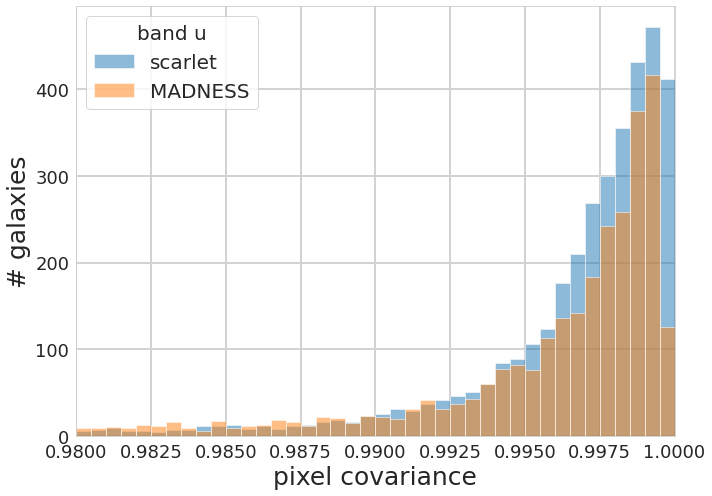

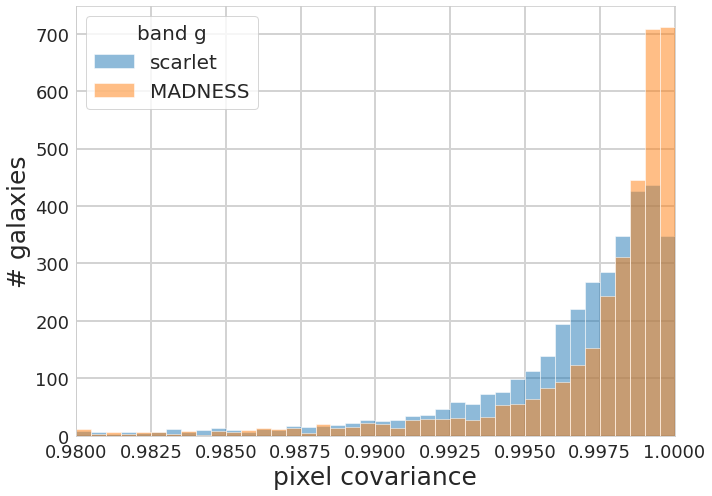

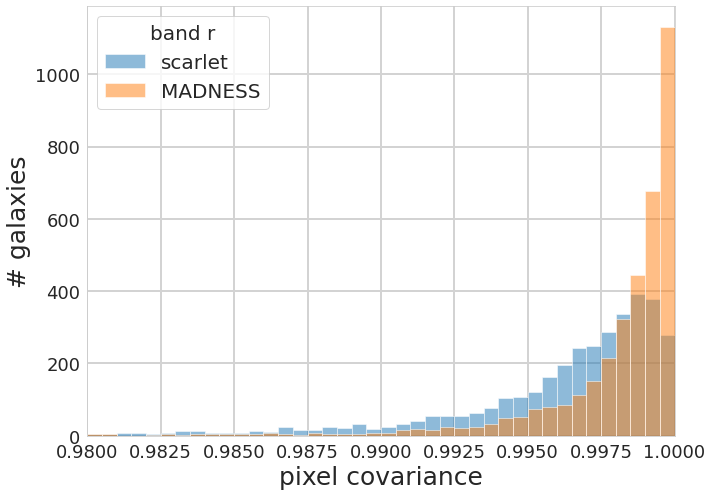

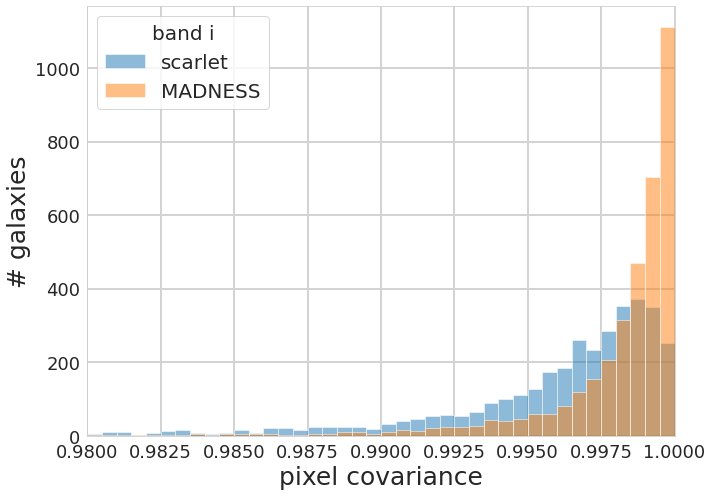

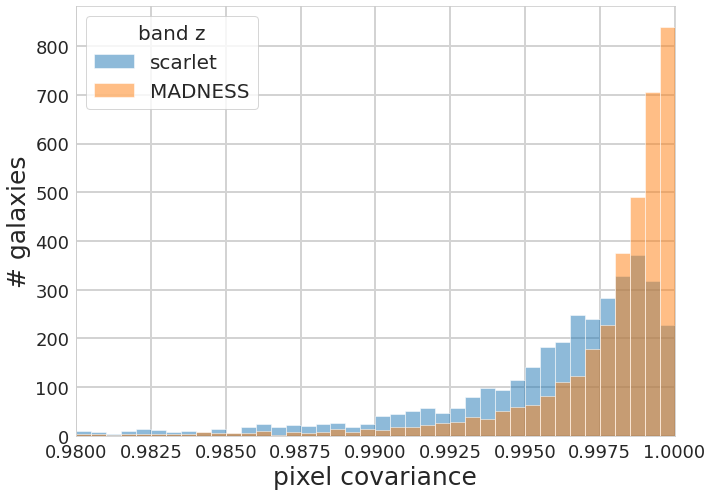

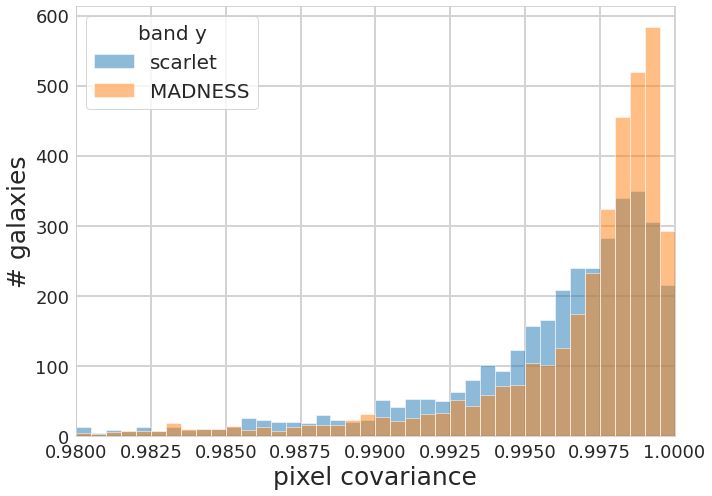

In [10]:
bins = np.arange(0.95, 1, 0.0005)
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    plt.figure(figsize=(10, 7))
    cov_band = band
    sns.set_style("whitegrid")
    plt.hist(scarlet_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="scarlet")
    plt.hist(madness_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="MADNESS")
    plt.legend()
    plt.xlim([0.98, 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("pixel covariance", fontsize=25)
    plt.ylabel("# galaxies", fontsize=25)
    plt.legend(fontsize=20, title="band " + band, loc="upper left", title_fontsize=20)
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.savefig(result_dir_path + "/cov_res_"+band)
    plt.show()

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.07211341861811388
Madness sig: 0.18269045215724258
Scarlet mu: -0.007739865003720755
Scarlet sig: 0.22173588072795364


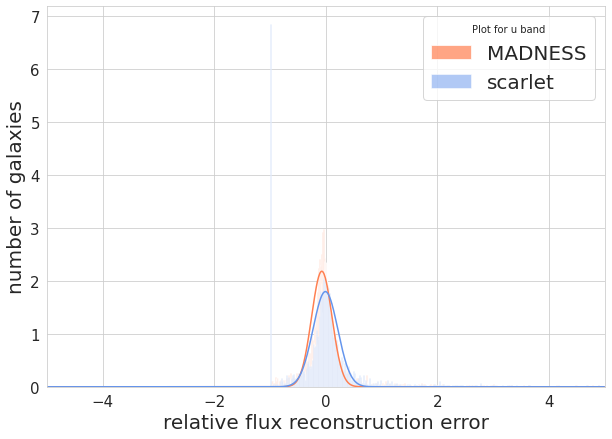

Madness mu: -0.028166355346074385
Madness sig: 0.09133037259645091
Scarlet mu: 0.006124617582625266
Scarlet sig: 0.172321131588433


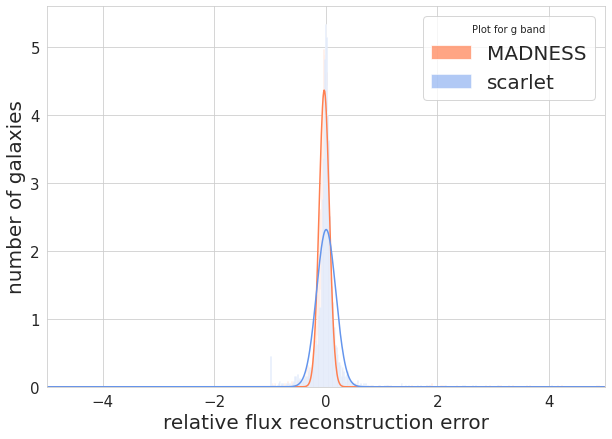

Madness mu: -0.022304699914294155
Madness sig: 0.06977866639540813
Scarlet mu: -5.087377419427898e-05
Scarlet sig: 0.0897398112224778


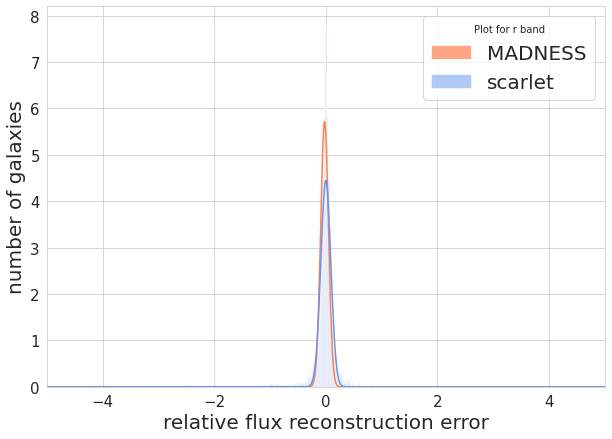

Madness mu: -0.011447093584436161
Madness sig: 0.07870305841754839
Scarlet mu: 0.02167416580785269
Scarlet sig: 0.10508496596846195


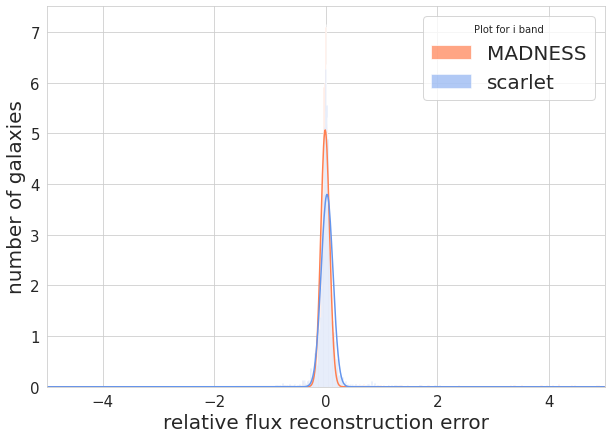

Madness mu: -0.01816427738929454
Madness sig: 0.08271092520026936
Scarlet mu: -0.006486195120874255
Scarlet sig: 0.12984052833397203


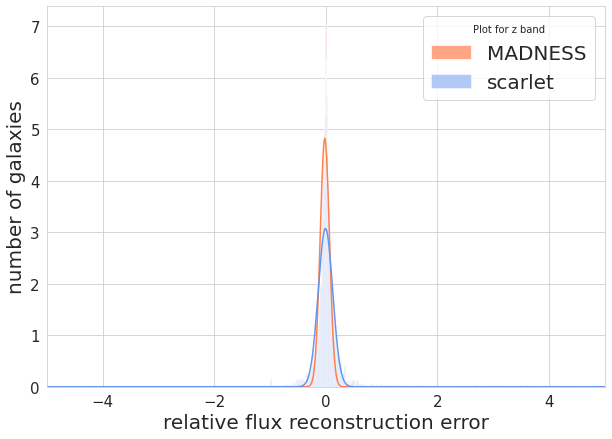

Madness mu: -0.008106067407542494
Madness sig: 0.13298745056149963
Scarlet mu: 0.02492799777075241
Scarlet sig: 0.18324558894933646


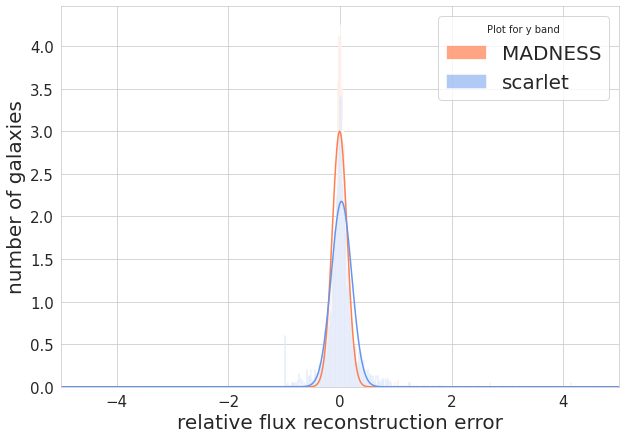

In [13]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
#     sns.set_theme(style={"axes.grid": True,
#                      'axes.labelcolor': 'black',
#                      'figure.facecolor': '1.',
#                      'xtick.color': 'black',
#                      'ytick.color': 'black',
#                      'text.color': 'black',
#                      'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

Madness mu: -0.07211341861811388
Madness sig: 0.18269045215724258
Scarlet mu: -0.007739865003720755
Scarlet sig: 0.22173588072795364


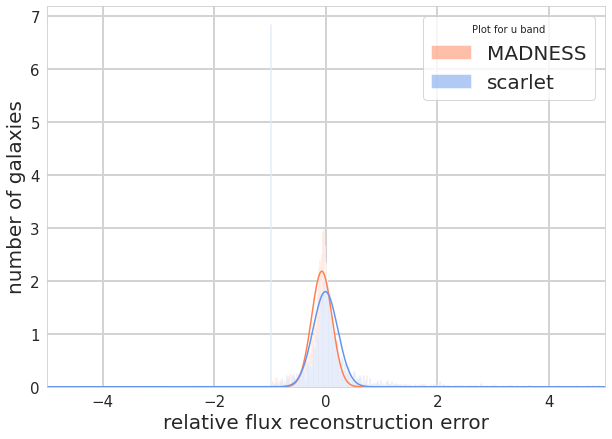

Madness mu: -0.028166355346074385
Madness sig: 0.09133037259645091
Scarlet mu: 0.006124617582625266
Scarlet sig: 0.172321131588433


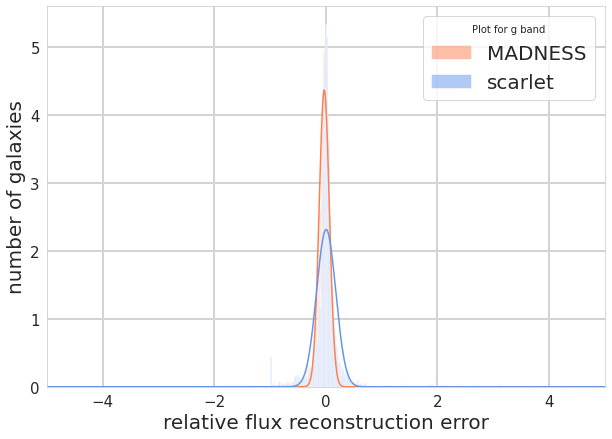

Madness mu: -0.022304699914294155
Madness sig: 0.06977866639540813
Scarlet mu: -5.087377419427898e-05
Scarlet sig: 0.0897398112224778


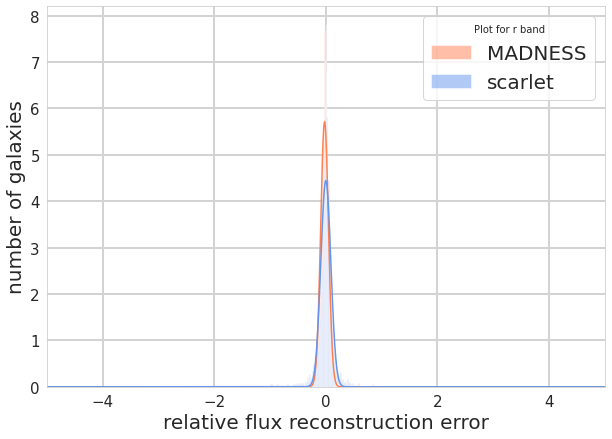

Madness mu: -0.011447093584436161
Madness sig: 0.07870305841754839
Scarlet mu: 0.02167416580785269
Scarlet sig: 0.10508496596846195


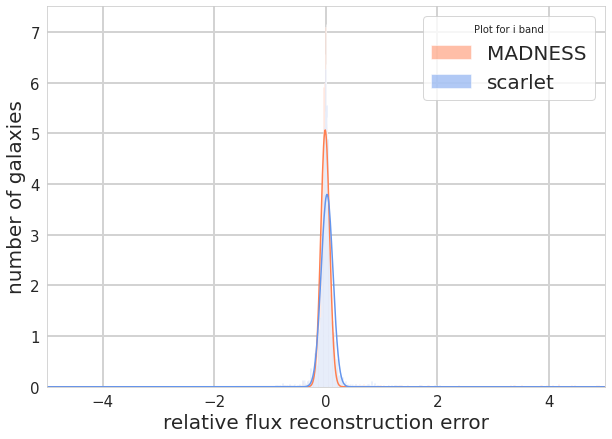

Madness mu: -0.01816427738929454
Madness sig: 0.08271092520026936
Scarlet mu: -0.006486195120874255
Scarlet sig: 0.12984052833397203


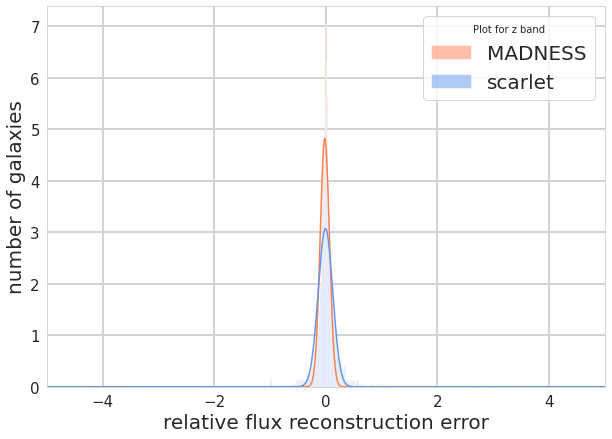

Madness mu: -0.008106067407542494
Madness sig: 0.13298745056149963
Scarlet mu: 0.02492799777075241
Scarlet sig: 0.18324558894933646


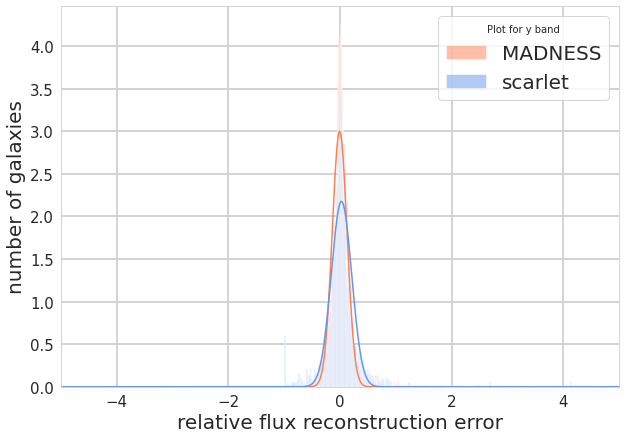

In [14]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
#     sns.set_theme(style={"axes.grid": True,
#                      'axes.labelcolor': 'white',
#                      'figure.facecolor': '.9',
#                      'xtick.color': 'white',
#                      'ytick.color': 'white',
#                      'text.color': 'black',
#                      'image.cmap': 'viridis',})
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

# Compare apperture photometry

In [15]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
7223.106108598709,344.0337785610821,0,58823.24540191653,1363.5148991038293,0,154413.23395751952,3156.402656407291,0,190043.34446823125,3772.5735658831095,0,160203.2930286407,4411.3303514217805,0,87652.97834251405,4781.475149208662,0,0,0,0
907.1851004576683,344.8231496452203,0,24910.404956989292,1366.6434268857406,0,62608.723947753904,3163.644889996348,0,46383.33224468947,3781.22957779609,0,30333.228590717317,4421.451964004585,0,15135.828034667973,4792.446043514732,0,1,0,0
4844.467498030663,344.9983201668796,0,39040.069429054274,1367.3376831798905,0,69035.7922659302,3165.2520249183954,0,63415.84885398866,3783.1504463872434,0,39143.30580398322,4423.698066239377,0,32534.039011459357,4794.880611131002,0,2,0,0
3220.801289968417,344.8231496452203,0,23009.699941835406,1366.6434268857404,0,59975.69059281707,3163.6448899963475,0,89330.81505996706,3781.2295777960912,0,71656.97124853134,4421.451964004585,0,36694.942306027406,4792.446043514731,0,3,0,0
25598.616372375487,344.56022688518743,0,216157.63927978513,1365.6013806595886,0,496944.9089892579,3161.23265564637,0,491645.65985839843,3778.346443882562,0,333780.05225708004,4418.080669603602,0,159479.58010862352,4788.791871390947,0,4,0,0
3531.8976897478096,344.4725413698638,0,42622.05751576424,1365.25385517218,0,164128.16082092284,3160.42816838162,0,143780.90644966127,3777.3849102255913,0,104314.17793899536,4416.956332985419,0,51884.346979751586,4787.573194218549,0,5,0,0
53538.447291259756,344.91074602657625,0,399983.427553711,1366.9905991069854,0,1172317.6704589843,3164.448559484732,0,1022011.6439892579,3782.1901340360987,0,845543.8426708985,4422.575157713546,0,494856.5917138672,4793.66348187897,0,6,0,0
3375.0941136431697,344.5602268851875,0,20410.152656154634,1365.6013806595888,0,88234.24451194766,3161.23265564637,0,96868.63572288513,3778.3464438825617,0,105209.12114311219,4418.080669603601,0,75617.45147094727,4788.791871390947,0,7,0,0
490.42304200172424,344.2971033440359,0,15072.91826122284,1364.55853867423,0,132333.80684152606,3158.818579192227,0,200607.52554870603,3775.461108262142,0,181632.87212066646,4414.706800711685,0,100602.88191383361,4785.134908756492,0,8,0,0


In [16]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
7223.595329375268,344.0337785610821,0,58828.33143127442,1363.5148991038293,0,154432.35363525394,3156.402656407291,0,190063.24564605713,3772.5735658831095,0,160218.71085754398,4411.3303514217805,0,87661.58251518253,4781.475149208662,0,0,0,0
923.7786541581153,344.8231496452203,0,24941.10054053307,1366.6434268857406,0,62475.04648090361,3163.644889996348,0,45036.80065259934,3781.22957779609,0,30590.174677734376,4421.451964004585,0,15757.792246856696,4792.446043514732,0,1,0,0
4845.816022915841,344.9983201668796,0,39051.8157436371,1367.3376831798905,0,69067.26411026005,3165.2520249183954,0,63449.52946533203,3783.1504463872434,0,39168.55972447396,4423.698066239377,0,32547.58497055055,4794.880611131002,0,2,0,0
3244.9038273334513,344.8231496452203,0,23098.59263347328,1366.6434268857404,0,60429.11942668914,3163.6448899963475,0,89797.28518009186,3781.2295777960912,0,71976.34852661131,4421.451964004585,0,36664.427551957364,4792.446043514731,0,3,0,0
25599.272533874515,344.56022688518743,0,216168.58888671876,1365.6013806595886,0,497000.83921386715,3161.23265564637,0,491715.00983642583,3778.346443882562,0,333837.16433837893,4418.080669603602,0,159511.84873122216,4788.791871390947,0,4,0,0
3533.139216618538,344.4725413698638,0,42631.955381317144,1365.25385517218,0,164157.48915512083,3160.42816838162,0,143815.3566554642,3777.3849102255913,0,104343.39022216796,4416.956332985419,0,51900.718327255265,4787.573194218549,0,5,0,0
53558.12631042479,344.91074602657625,0,399918.73132812494,1366.9905991069854,0,1170561.7782031253,3164.448559484732,0,1019044.3330371095,3782.1901340360987,0,842966.3091064453,4422.575157713546,0,493432.4446289061,4793.66348187897,0,6,0,0
3376.271993033886,344.5602268851875,0,20455.312176589963,1365.6013806595888,0,88534.52676792143,3161.23265564637,0,97256.65825035094,3778.3464438825617,0,105524.63921359065,4418.080669603601,0,75791.8496190262,4788.791871390947,0,7,0,0
491.75358210563684,344.2971033440359,0,15084.2418270874,1364.55853867423,0,132368.85983921526,3158.818579192227,0,200643.9524963379,3775.461108262142,0,181662.05699447636,4414.706800711685,0,100619.41610359194,4785.134908756492,0,8,0,0


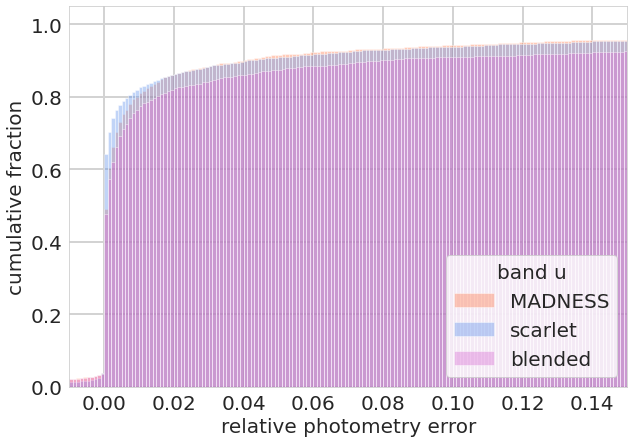

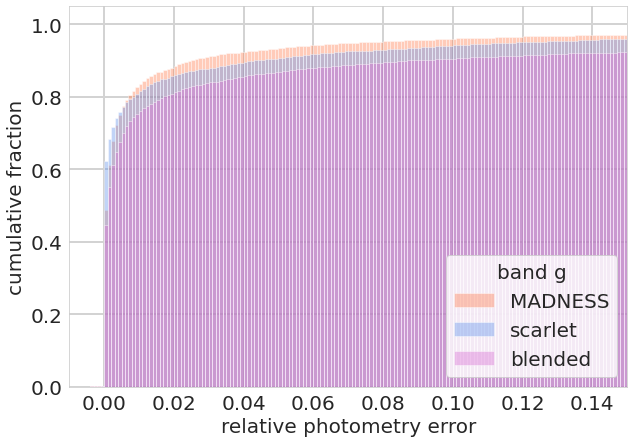

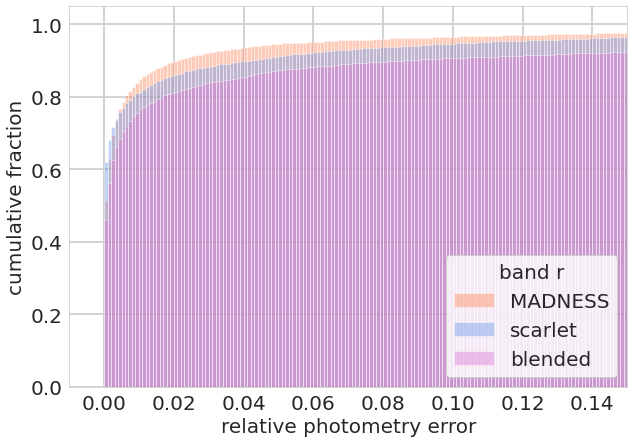

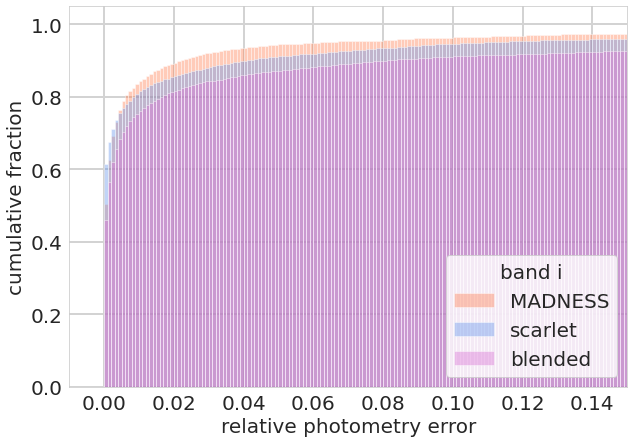

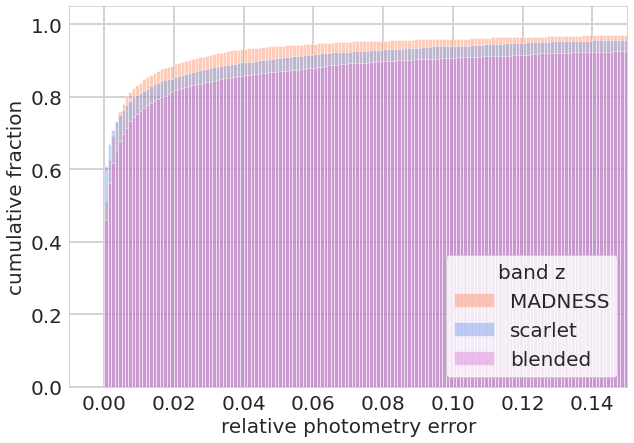

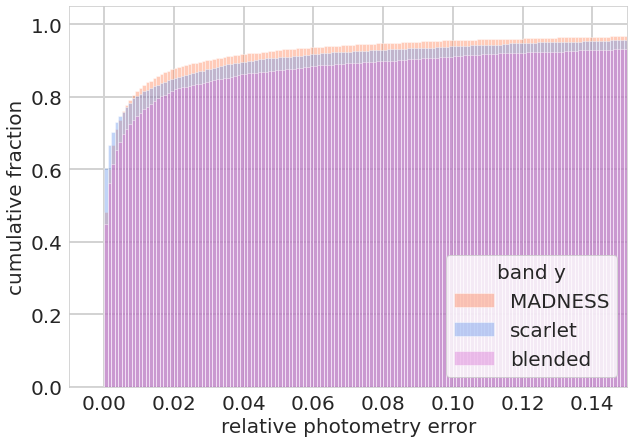

In [17]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    #sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style("whitegrid")
#     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
# })
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.4,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        density=True,
        alpha=0.4,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.4,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([-.01, .15])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("relative photometry error", fontsize=20)
    plt.ylabel("cumulative fraction", fontsize=20)
    plt.legend(fontsize=20, title="band " + band, loc="lower right", title_fontsize=20)
    plt.savefig(result_dir_path + "/cumulative_distib_phot_err_"+band)
    plt.show()

# error variation plots

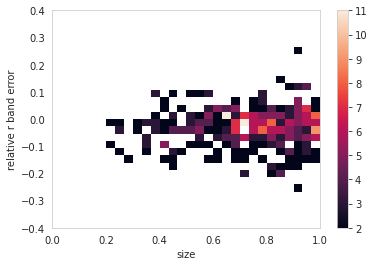

In [18]:
h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [19]:
madness_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9990105774673456,11084.474978775514,10840.057,0.00016755744908925063,0.999589863126226,84951.18487571785,85330.09,0.00021792632775941012,0.9995275040187172,220262.0897834613,233676.58,0.00029909977734654536,0.9996022152731416,286832.2118268423,278591.72,0.0002338075379337834,0.9993762083387611,243519.9013066301,229111.88,0.00020884066619686337,0.9987446814262011,124324.61305632372,132071.02,0.00022611939468042408,0,2.934391691481652,0,0,402700974452,-14.921077391211009,-0.0639777500246339,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,27.394612913575557,101.6801112490309,0.0,0.0,0.0,0.0,0.0,0.0,-0.02205051106331372,0.0044603130001834,0.06090239293891394,-0.02872931538741186,-0.05916570362143883,0.06230787595668498
0.9662409145630353,1038.0878058278204,2186.248,0.15977375193291243,0.9936364167606445,45992.9815913582,38923.375,0.16417911313303635,0.9959293593943783,100292.19300378626,110053.484,0.3820123544736328,0.9924385400493827,70732.69309614599,82662.7,0.5267540167407545,0.9882151794692373,41316.09824937431,48449.387,0.6019849303528784,0.9624631658003608,18251.14247549462,22002.488,0.6499096321334094,1,3.20668812036312,0,0,402703695649,12.312215341975133,-7.551624153399842,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,163.56107678303337,64.24187914877427,0.0,0.0,0.0,0.0,0.0,0.0,1.106033838950244,-0.1537105520614157,0.09732852656682088,0.16866330838891871,0.17265155161363088,0.20554032772426295
0.9987160323957484,8720.945721874443,7610.3706,0.0007521338294440572,0.9992325747700179,66594.87062673038,63206.797,0.0008258926415491974,0.9989455428733347,128778.03002653725,115056.91,0.0010862659514180306,0.9987834313936053,103378.10456716688,96064.234,0.0014232740139300537,0.9980976561270518,74610.42538623582,67994.516,0.001452852298630125,0.9976959339699679,43779.83787116106,40373.65,0.0013182075758166878,2,2.9987727965302757,0,0,402702291885,14.544104257126662,8.300584680026052,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.9987727965302757,174.7205214060769,143.50292352560183,0.0,0.0,0.0,0.0,0.0,0.0,-0.12734572050139886,-0.05087589659451109,-0.10654863856598631,-0.07074873565141554,-0.

In [20]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
7223.595329375268,344.0337785610821,0,58828.33143127442,1363.5148991038293,0,154432.35363525394,3156.402656407291,0,190063.24564605713,3772.5735658831095,0,160218.71085754398,4411.3303514217805,0,87661.58251518253,4781.475149208662,0,0,0,0
923.7786541581153,344.8231496452203,0,24941.10054053307,1366.6434268857406,0,62475.04648090361,3163.644889996348,0,45036.80065259934,3781.22957779609,0,30590.174677734376,4421.451964004585,0,15757.792246856696,4792.446043514732,0,1,0,0
4845.816022915841,344.9983201668796,0,39051.8157436371,1367.3376831798905,0,69067.26411026005,3165.2520249183954,0,63449.52946533203,3783.1504463872434,0,39168.55972447396,4423.698066239377,0,32547.58497055055,4794.880611131002,0,2,0,0
3244.9038273334513,344.8231496452203,0,23098.59263347328,1366.6434268857404,0,60429.11942668914,3163.6448899963475,0,89797.28518009186,3781.2295777960912,0,71976.34852661131,4421.451964004585,0,36664.427551957364,4792.446043514731,0,3,0,0
25599.272533874515,344.56022688518743,0,216168.58888671876,1365.6013806595886,0,497000.83921386715,3161.23265564637,0,491715.00983642583,3778.346443882562,0,333837.16433837893,4418.080669603602,0,159511.84873122216,4788.791871390947,0,4,0,0
3533.139216618538,344.4725413698638,0,42631.955381317144,1365.25385517218,0,164157.48915512083,3160.42816838162,0,143815.3566554642,3777.3849102255913,0,104343.39022216796,4416.956332985419,0,51900.718327255265,4787.573194218549,0,5,0,0
53558.12631042479,344.91074602657625,0,399918.73132812494,1366.9905991069854,0,1170561.7782031253,3164.448559484732,0,1019044.3330371095,3782.1901340360987,0,842966.3091064453,4422.575157713546,0,493432.4446289061,4793.66348187897,0,6,0,0
3376.271993033886,344.5602268851875,0,20455.312176589963,1365.6013806595888,0,88534.52676792143,3161.23265564637,0,97256.65825035094,3778.3464438825617,0,105524.63921359065,4418.080669603601,0,75791.8496190262,4788.791871390947,0,7,0,0
491.75358210563684,344.2971033440359,0,15084.2418270874,1364.55853867423,0,132368.85983921526,3158.818579192227,0,200643.9524963379,3775.461108262142,0,181662.05699447636,4414.706800711685,0,100619.41610359194,4785.134908756492,0,8,0,0


In [21]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
7223.106108598709,344.0337785610821,0,58823.24540191653,1363.5148991038293,0,154413.23395751952,3156.402656407291,0,190043.34446823125,3772.5735658831095,0,160203.2930286407,4411.3303514217805,0,87652.97834251405,4781.475149208662,0,0,0,0
907.1851004576683,344.8231496452203,0,24910.404956989292,1366.6434268857406,0,62608.723947753904,3163.644889996348,0,46383.33224468947,3781.22957779609,0,30333.228590717317,4421.451964004585,0,15135.828034667973,4792.446043514732,0,1,0,0
4844.467498030663,344.9983201668796,0,39040.069429054274,1367.3376831798905,0,69035.7922659302,3165.2520249183954,0,63415.84885398866,3783.1504463872434,0,39143.30580398322,4423.698066239377,0,32534.039011459357,4794.880611131002,0,2,0,0
3220.801289968417,344.8231496452203,0,23009.699941835406,1366.6434268857404,0,59975.69059281707,3163.6448899963475,0,89330.81505996706,3781.2295777960912,0,71656.97124853134,4421.451964004585,0,36694.942306027406,4792.446043514731,0,3,0,0
25598.616372375487,344.56022688518743,0,216157.63927978513,1365.6013806595886,0,496944.9089892579,3161.23265564637,0,491645.65985839843,3778.346443882562,0,333780.05225708004,4418.080669603602,0,159479.58010862352,4788.791871390947,0,4,0,0
3531.8976897478096,344.4725413698638,0,42622.05751576424,1365.25385517218,0,164128.16082092284,3160.42816838162,0,143780.90644966127,3777.3849102255913,0,104314.17793899536,4416.956332985419,0,51884.346979751586,4787.573194218549,0,5,0,0
53538.447291259756,344.91074602657625,0,399983.427553711,1366.9905991069854,0,1172317.6704589843,3164.448559484732,0,1022011.6439892579,3782.1901340360987,0,845543.8426708985,4422.575157713546,0,494856.5917138672,4793.66348187897,0,6,0,0
3375.0941136431697,344.5602268851875,0,20410.152656154634,1365.6013806595888,0,88234.24451194766,3161.23265564637,0,96868.63572288513,3778.3464438825617,0,105209.12114311219,4418.080669603601,0,75617.45147094727,4788.791871390947,0,7,0,0
490.42304200172424,344.2971033440359,0,15072.91826122284,1364.55853867423,0,132333.80684152606,3158.818579192227,0,200607.52554870603,3775.461108262142,0,181632.87212066646,4414.706800711685,0,100602.88191383361,4785.134908756492,0,8,0,0


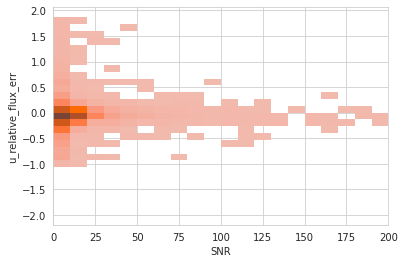

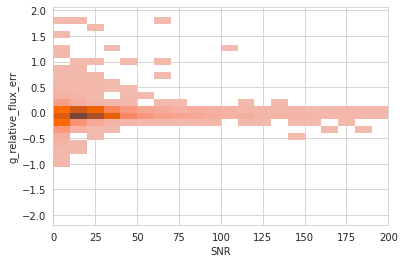

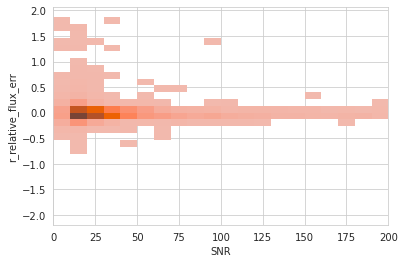

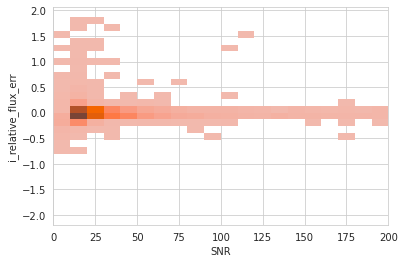

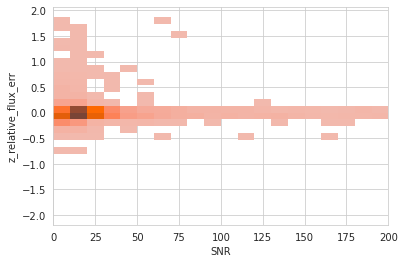

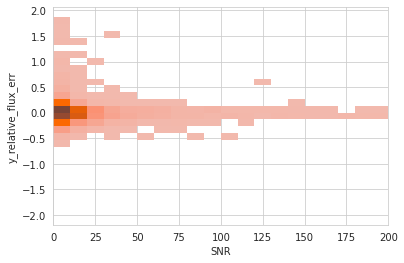

In [22]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True, color='coral')
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

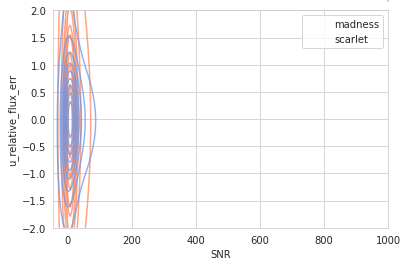

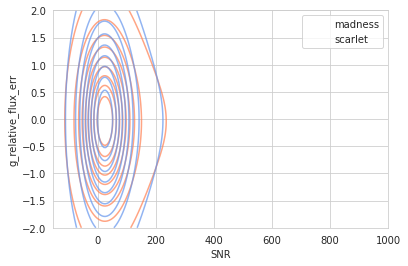

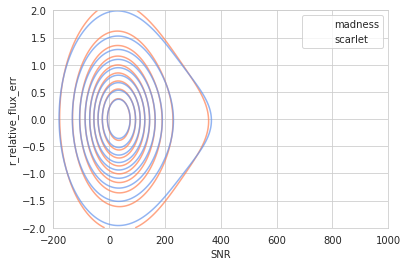

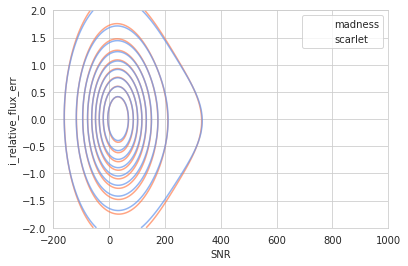

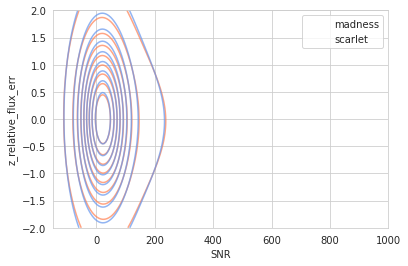

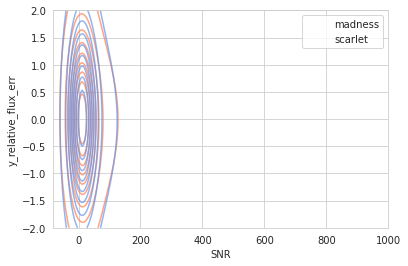

In [23]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7, label="madness",  color="coral")
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet", color="cornflowerblue")
    #sns.legend()
    plt.xlabel("SNR")
    plt.legend()
    plt.show()

# Compare with blendedness

/tmp/ipykernel_2716/3305847454.py:2: RuntimeWarning: invalid value encountered in log
  snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])


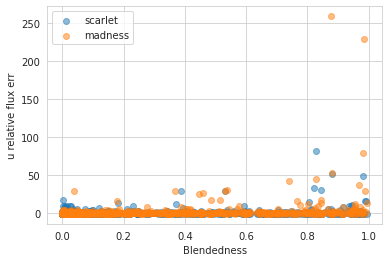

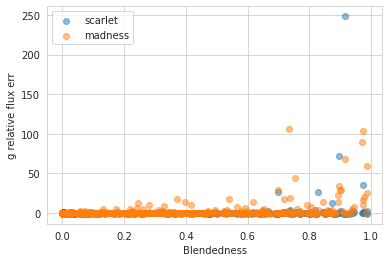

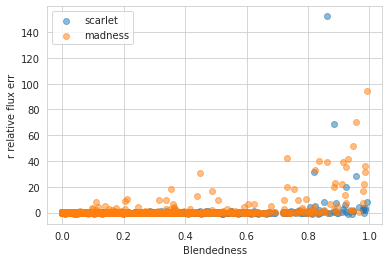

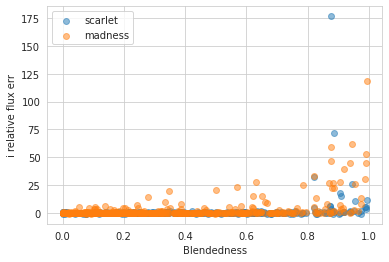

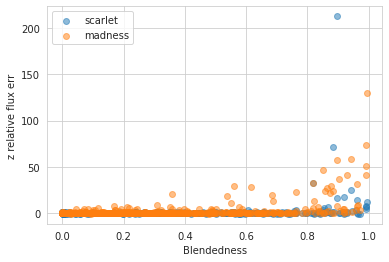

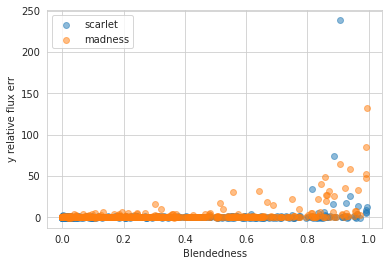

In [24]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()

In [25]:
# Validate SNR vs mag 

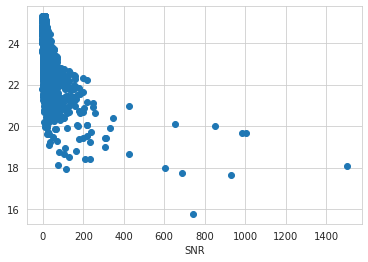

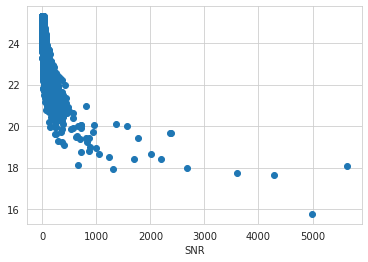

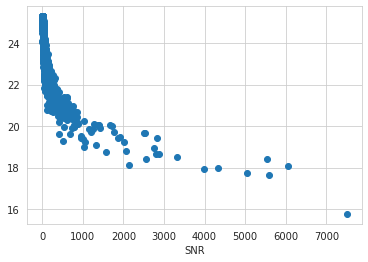

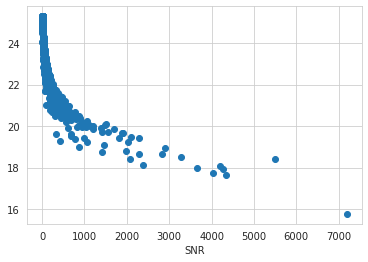

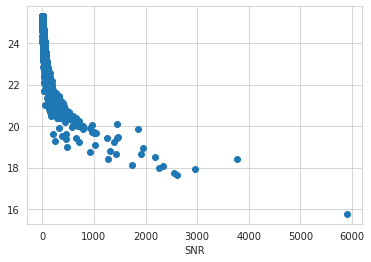

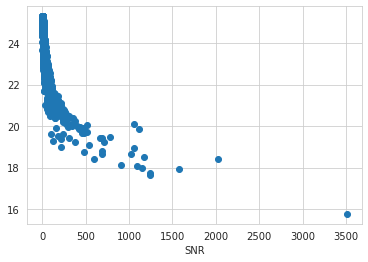

In [26]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["ref_mag"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


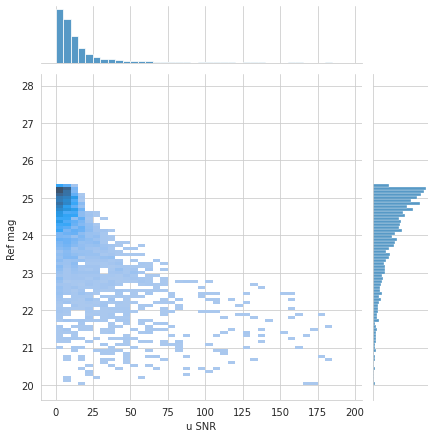

Plot for g band


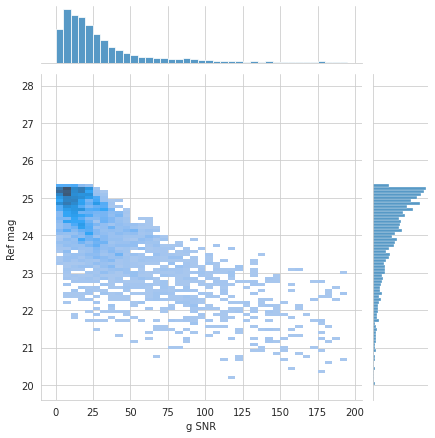

Plot for r band


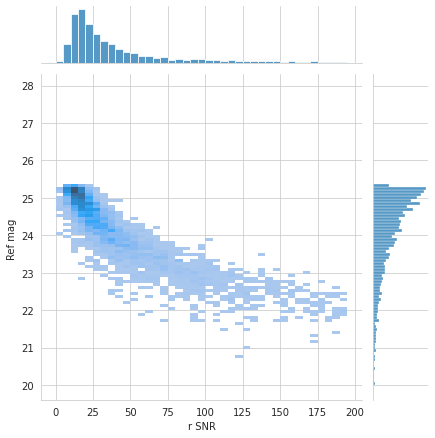

Plot for i band


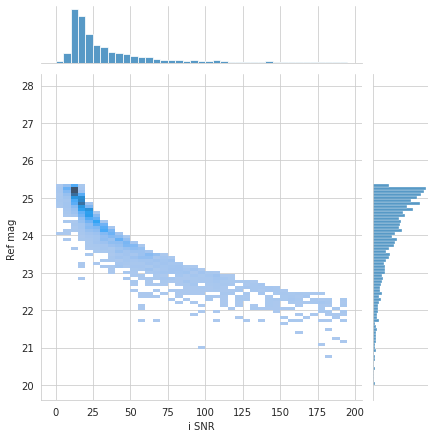

Plot for z band


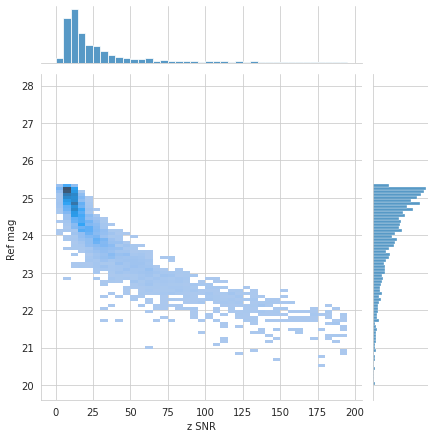

Plot for y band


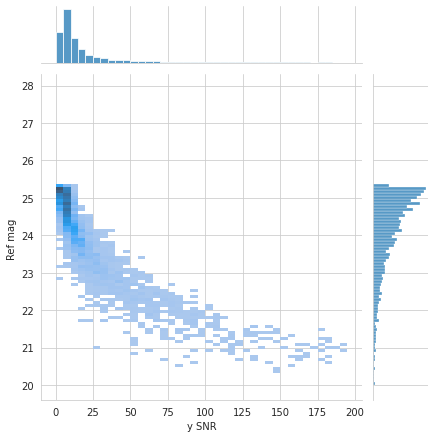

In [27]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_flux"].value / actual_photometry[band+"_fluxerrs"].value
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 28, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"], ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()